In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
MY_BOUNDED_SET = 45000

num_input = 3
num_output = 3

num_hidden1 = 16
num_hidden2 = 16

N_EPOCHS = 10000
epoch = 0
train_rmse_list = []
test_rmse_list = []

session = tf.Session()

In [28]:
x = tf.placeholder(tf.float32, shape=[None, num_input])

y_true = tf.placeholder(tf.float32, shape=[None, num_output], name='y_true')
y_pred = tf.placeholder(tf.float32, shape=[None, num_output])

In [29]:
data_csv = pd.read_csv('../myCSVData.csv')
X = data_csv[['in1','in2','in3']]
y = data_csv[['out1','out2','out3']]
#X, y

In [30]:
X_train_pd = X[:MY_BOUNDED_SET]
X_test_pd = X[MY_BOUNDED_SET:]
y_train_pd = y[:MY_BOUNDED_SET]
y_test_pd = y[MY_BOUNDED_SET:]

X_train = X_train_pd.values
X_train = X_train.astype(np.float32)

y_train = y_train_pd.values
y_train = y_train.astype(np.float32)

X_test = X_test_pd.values
X_test = X_test.astype(np.float32)

y_test = y_test_pd.values
y_test = y_test.astype(np.float32)

print (X_train.shape, y_train.shape,X_test.shape,y_test.shape)

(4, 3) (4, 3) (0, 3) (0, 3)


In [31]:
# Evaluation
#rmse_a = tf.placeholder(tf.float32, [None, 3])
#rmse_b = tf.placeholder(tf.float32, [None, 3])
#rmse = tf.reduce_mean(tf.square(rmse_a - rmse_b))
rmse_a = []

In [32]:
def cost_func(layer, my_y_true):
    ret = tf.sqrt(tf.reduce_mean(tf.square(layer - my_y_true)))
    #print (layer , my_y_true)
    #ret = tf.reduce_mean(tf.square(layer))
    return ret
            

In [33]:
X_train

array([[0.0827067, 0.740974 , 0.36644  ],
       [0.0827297, 0.740762 , 0.365998 ],
       [0.082753 , 0.74055  , 0.365552 ],
       [0.082776 , 0.740335 , 0.365109 ]], dtype=float32)

In [34]:
# Neural Network Structure
inputs = X_train

# Input Layer
input_layer = tf.Variable(inputs)

# Hidden Layer #1
h1 = tf.layers.dense(inputs=input_layer, 
                     units=num_hidden1,
                     use_bias=True,
                     activation=tf.nn.relu)
   
# Hidden Layer #2
h2 = tf.layers.dense(inputs=h1, 
                     units=num_hidden2,
                     use_bias=True,
                     activation=tf.nn.relu)
    
# Output Layer
output_layer = tf.layers.dense(inputs=h2, 
                     units=num_output,
                     use_bias=True,
                     activation=None)


In [35]:
cost = cost_func(output_layer,y_true)
output_layer

<tf.Tensor 'dense_6/BiasAdd:0' shape=(4, 3) dtype=float32>

In [50]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-6).minimize(cost)

In [51]:
session.run(tf.global_variables_initializer())

In [52]:
#print (session.run(tf.subtract(output_layer,y_true)).shape)
#print (X_train.shape)

In [53]:
print (y_true.shape)

(?, 3)


In [54]:
def train(N_EPOCHS):
    #global epoch
    global rmse_a
    for i in range(epoch, epoch + N_EPOCHS):
        feed_dict_train = {x: X_train,
                      y_true:X_train}

        
        session.run(optimizer, feed_dict=feed_dict_train)
        #epoch+=1
        cost_error = session.run(cost,feed_dict=feed_dict_train)
        print ("[" +str(i+1) +"]")
        print ("Train Accuracy : " , cost_error)
        
        rmse_a += [cost_error]

In [55]:
def predict():
    session.run(tf.global_variables_initializer())
    feed_dict_test = {x: X_test,
                    y_true:y_test}
    print ("Test Accuracy : " , session.run(cost,feed_dict=feed_dict_test))

In [56]:
train(N_EPOCHS)
#predict()
output_layer

[1]
Train Accuracy :  0.48562896
[2]
Train Accuracy :  0.4856198
[3]
Train Accuracy :  0.4856106
[4]
Train Accuracy :  0.48560148
[5]
Train Accuracy :  0.4855923
[6]
Train Accuracy :  0.4855832
[7]
Train Accuracy :  0.48557404
[8]
Train Accuracy :  0.4855649
[9]
Train Accuracy :  0.4855557
[10]
Train Accuracy :  0.48554653
[11]
Train Accuracy :  0.4855374
[12]
Train Accuracy :  0.48552826
[13]
Train Accuracy :  0.4855191
[14]
Train Accuracy :  0.4855099
[15]
Train Accuracy :  0.48550078
[16]
Train Accuracy :  0.48549163
[17]
Train Accuracy :  0.4854825
[18]
Train Accuracy :  0.48547333
[19]
Train Accuracy :  0.48546416
[20]
Train Accuracy :  0.48545507
[21]
Train Accuracy :  0.48544586
[22]
Train Accuracy :  0.48543674
[23]
Train Accuracy :  0.4854276
[24]
Train Accuracy :  0.48541844
[25]
Train Accuracy :  0.4854093
[26]
Train Accuracy :  0.4854001
[27]
Train Accuracy :  0.485391
[28]
Train Accuracy :  0.4853818
[29]
Train Accuracy :  0.4853727
[30]
Train Accuracy :  0.48536348
[31]
T

[253]
Train Accuracy :  0.48333097
[254]
Train Accuracy :  0.48332188
[255]
Train Accuracy :  0.4833128
[256]
Train Accuracy :  0.48330373
[257]
Train Accuracy :  0.4832946
[258]
Train Accuracy :  0.48328555
[259]
Train Accuracy :  0.4832765
[260]
Train Accuracy :  0.4832674
[261]
Train Accuracy :  0.4832583
[262]
Train Accuracy :  0.48324922
[263]
Train Accuracy :  0.48324016
[264]
Train Accuracy :  0.4832311
[265]
Train Accuracy :  0.483222
[266]
Train Accuracy :  0.48321292
[267]
Train Accuracy :  0.48320386
[268]
Train Accuracy :  0.48319477
[269]
Train Accuracy :  0.48318568
[270]
Train Accuracy :  0.48317662
[271]
Train Accuracy :  0.48316756
[272]
Train Accuracy :  0.48315847
[273]
Train Accuracy :  0.48314935
[274]
Train Accuracy :  0.4831403
[275]
Train Accuracy :  0.48313123
[276]
Train Accuracy :  0.48312217
[277]
Train Accuracy :  0.48311308
[278]
Train Accuracy :  0.48310402
[279]
Train Accuracy :  0.48309493
[280]
Train Accuracy :  0.48308584
[281]
Train Accuracy :  0.483

[525]
Train Accuracy :  0.48087034
[526]
Train Accuracy :  0.48086134
[527]
Train Accuracy :  0.48085234
[528]
Train Accuracy :  0.4808433
[529]
Train Accuracy :  0.48083428
[530]
Train Accuracy :  0.48082528
[531]
Train Accuracy :  0.48081627
[532]
Train Accuracy :  0.48080724
[533]
Train Accuracy :  0.4807982
[534]
Train Accuracy :  0.48078924
[535]
Train Accuracy :  0.4807802
[536]
Train Accuracy :  0.4807712
[537]
Train Accuracy :  0.48076218
[538]
Train Accuracy :  0.48075318
[539]
Train Accuracy :  0.48074415
[540]
Train Accuracy :  0.48073515
[541]
Train Accuracy :  0.48072615
[542]
Train Accuracy :  0.48071712
[543]
Train Accuracy :  0.48070812
[544]
Train Accuracy :  0.4806991
[545]
Train Accuracy :  0.4806901
[546]
Train Accuracy :  0.4806811
[547]
Train Accuracy :  0.4806721
[548]
Train Accuracy :  0.48066306
[549]
Train Accuracy :  0.48065406
[550]
Train Accuracy :  0.48064506
[551]
Train Accuracy :  0.48063603
[552]
Train Accuracy :  0.48062703
[553]
Train Accuracy :  0.48

[792]
Train Accuracy :  0.47846892
[793]
Train Accuracy :  0.47845995
[794]
Train Accuracy :  0.47845098
[795]
Train Accuracy :  0.47844198
[796]
Train Accuracy :  0.47843304
[797]
Train Accuracy :  0.47842404
[798]
Train Accuracy :  0.4784151
[799]
Train Accuracy :  0.47840613
[800]
Train Accuracy :  0.4783971
[801]
Train Accuracy :  0.47838813
[802]
Train Accuracy :  0.47837916
[803]
Train Accuracy :  0.4783702
[804]
Train Accuracy :  0.47836128
[805]
Train Accuracy :  0.47835228
[806]
Train Accuracy :  0.47834328
[807]
Train Accuracy :  0.4783343
[808]
Train Accuracy :  0.47832534
[809]
Train Accuracy :  0.47831637
[810]
Train Accuracy :  0.47830743
[811]
Train Accuracy :  0.47829846
[812]
Train Accuracy :  0.47828948
[813]
Train Accuracy :  0.4782805
[814]
Train Accuracy :  0.47827154
[815]
Train Accuracy :  0.47826257
[816]
Train Accuracy :  0.4782536
[817]
Train Accuracy :  0.47824463
[818]
Train Accuracy :  0.47823566
[819]
Train Accuracy :  0.47822672
[820]
Train Accuracy :  0.

[1054]
Train Accuracy :  0.4761237
[1055]
Train Accuracy :  0.47611478
[1056]
Train Accuracy :  0.4761058
[1057]
Train Accuracy :  0.47609693
[1058]
Train Accuracy :  0.476088
[1059]
Train Accuracy :  0.47607905
[1060]
Train Accuracy :  0.4760701
[1061]
Train Accuracy :  0.4760612
[1062]
Train Accuracy :  0.47605225
[1063]
Train Accuracy :  0.47604334
[1064]
Train Accuracy :  0.4760344
[1065]
Train Accuracy :  0.47602546
[1066]
Train Accuracy :  0.47601655
[1067]
Train Accuracy :  0.4760076
[1068]
Train Accuracy :  0.4759987
[1069]
Train Accuracy :  0.4759898
[1070]
Train Accuracy :  0.47598082
[1071]
Train Accuracy :  0.4759719
[1072]
Train Accuracy :  0.47596297
[1073]
Train Accuracy :  0.47595406
[1074]
Train Accuracy :  0.47594512
[1075]
Train Accuracy :  0.47593617
[1076]
Train Accuracy :  0.47592726
[1077]
Train Accuracy :  0.47591832
[1078]
Train Accuracy :  0.4759094
[1079]
Train Accuracy :  0.4759005
[1080]
Train Accuracy :  0.47589156
[1081]
Train Accuracy :  0.47588265
[1082

[1297]
Train Accuracy :  0.47395882
[1298]
Train Accuracy :  0.47394997
[1299]
Train Accuracy :  0.4739411
[1300]
Train Accuracy :  0.4739322
[1301]
Train Accuracy :  0.4739233
[1302]
Train Accuracy :  0.47391444
[1303]
Train Accuracy :  0.47390556
[1304]
Train Accuracy :  0.47389665
[1305]
Train Accuracy :  0.47388777
[1306]
Train Accuracy :  0.4738789
[1307]
Train Accuracy :  0.47387
[1308]
Train Accuracy :  0.47386113
[1309]
Train Accuracy :  0.47385228
[1310]
Train Accuracy :  0.47384337
[1311]
Train Accuracy :  0.4738345
[1312]
Train Accuracy :  0.4738256
[1313]
Train Accuracy :  0.47381672
[1314]
Train Accuracy :  0.47380787
[1315]
Train Accuracy :  0.473799
[1316]
Train Accuracy :  0.4737901
[1317]
Train Accuracy :  0.47378123
[1318]
Train Accuracy :  0.47377235
[1319]
Train Accuracy :  0.47376347
[1320]
Train Accuracy :  0.4737546
[1321]
Train Accuracy :  0.47374573
[1322]
Train Accuracy :  0.47373682
[1323]
Train Accuracy :  0.473728
[1324]
Train Accuracy :  0.47371906
[1325]


[1557]
Train Accuracy :  0.4716543
[1558]
Train Accuracy :  0.47164544
[1559]
Train Accuracy :  0.4716366
[1560]
Train Accuracy :  0.47162774
[1561]
Train Accuracy :  0.4716189
[1562]
Train Accuracy :  0.47161004
[1563]
Train Accuracy :  0.47160122
[1564]
Train Accuracy :  0.47159237
[1565]
Train Accuracy :  0.47158355
[1566]
Train Accuracy :  0.4715747
[1567]
Train Accuracy :  0.47156587
[1568]
Train Accuracy :  0.47155702
[1569]
Train Accuracy :  0.47154817
[1570]
Train Accuracy :  0.47153932
[1571]
Train Accuracy :  0.47153047
[1572]
Train Accuracy :  0.47152165
[1573]
Train Accuracy :  0.47151276
[1574]
Train Accuracy :  0.47150394
[1575]
Train Accuracy :  0.4714951
[1576]
Train Accuracy :  0.47148627
[1577]
Train Accuracy :  0.47147742
[1578]
Train Accuracy :  0.47146857
[1579]
Train Accuracy :  0.47145975
[1580]
Train Accuracy :  0.4714509
[1581]
Train Accuracy :  0.47144204
[1582]
Train Accuracy :  0.47143322
[1583]
Train Accuracy :  0.47142437
[1584]
Train Accuracy :  0.4714155

[1840]
Train Accuracy :  0.4691565
[1841]
Train Accuracy :  0.4691477
[1842]
Train Accuracy :  0.46913892
[1843]
Train Accuracy :  0.4691301
[1844]
Train Accuracy :  0.46912128
[1845]
Train Accuracy :  0.46911252
[1846]
Train Accuracy :  0.46910366
[1847]
Train Accuracy :  0.4690949
[1848]
Train Accuracy :  0.46908608
[1849]
Train Accuracy :  0.46907726
[1850]
Train Accuracy :  0.46906847
[1851]
Train Accuracy :  0.46905965
[1852]
Train Accuracy :  0.46905082
[1853]
Train Accuracy :  0.46904203
[1854]
Train Accuracy :  0.46903327
[1855]
Train Accuracy :  0.4690244
[1856]
Train Accuracy :  0.4690156
[1857]
Train Accuracy :  0.4690068
[1858]
Train Accuracy :  0.46899796
[1859]
Train Accuracy :  0.4689892
[1860]
Train Accuracy :  0.4689804
[1861]
Train Accuracy :  0.46897158
[1862]
Train Accuracy :  0.4689628
[1863]
Train Accuracy :  0.46895397
[1864]
Train Accuracy :  0.4689452
[1865]
Train Accuracy :  0.46893635
[1866]
Train Accuracy :  0.46892753
[1867]
Train Accuracy :  0.46891877
[18

[2127]
Train Accuracy :  0.46663442
[2128]
Train Accuracy :  0.4666257
[2129]
Train Accuracy :  0.46661687
[2130]
Train Accuracy :  0.4666081
[2131]
Train Accuracy :  0.46659938
[2132]
Train Accuracy :  0.46659055
[2133]
Train Accuracy :  0.4665818
[2134]
Train Accuracy :  0.46657306
[2135]
Train Accuracy :  0.46656427
[2136]
Train Accuracy :  0.46655554
[2137]
Train Accuracy :  0.46654674
[2138]
Train Accuracy :  0.46653798
[2139]
Train Accuracy :  0.46652922
[2140]
Train Accuracy :  0.46652046
[2141]
Train Accuracy :  0.46651173
[2142]
Train Accuracy :  0.46650317
[2143]
Train Accuracy :  0.46649468
[2144]
Train Accuracy :  0.46648616
[2145]
Train Accuracy :  0.4664776
[2146]
Train Accuracy :  0.4664691
[2147]
Train Accuracy :  0.4664606
[2148]
Train Accuracy :  0.4664521
[2149]
Train Accuracy :  0.4664436
[2150]
Train Accuracy :  0.46643513
[2151]
Train Accuracy :  0.46642664
[2152]
Train Accuracy :  0.46641818
[2153]
Train Accuracy :  0.46640974
[2154]
Train Accuracy :  0.46640143


[2381]
Train Accuracy :  0.46456808
[2382]
Train Accuracy :  0.46456003
[2383]
Train Accuracy :  0.46455202
[2384]
Train Accuracy :  0.46454403
[2385]
Train Accuracy :  0.46453598
[2386]
Train Accuracy :  0.46452802
[2387]
Train Accuracy :  0.46452
[2388]
Train Accuracy :  0.464512
[2389]
Train Accuracy :  0.46450394
[2390]
Train Accuracy :  0.464496
[2391]
Train Accuracy :  0.46448797
[2392]
Train Accuracy :  0.46447995
[2393]
Train Accuracy :  0.46447197
[2394]
Train Accuracy :  0.46446398
[2395]
Train Accuracy :  0.46445596
[2396]
Train Accuracy :  0.46444795
[2397]
Train Accuracy :  0.46443993
[2398]
Train Accuracy :  0.46443194
[2399]
Train Accuracy :  0.46442395
[2400]
Train Accuracy :  0.4644159
[2401]
Train Accuracy :  0.46440792
[2402]
Train Accuracy :  0.46439993
[2403]
Train Accuracy :  0.46439192
[2404]
Train Accuracy :  0.46438396
[2405]
Train Accuracy :  0.46437594
[2406]
Train Accuracy :  0.46436796
[2407]
Train Accuracy :  0.46435994
[2408]
Train Accuracy :  0.46435195


[2662]
Train Accuracy :  0.46233132
[2663]
Train Accuracy :  0.4623234
[2664]
Train Accuracy :  0.46231547
[2665]
Train Accuracy :  0.46230754
[2666]
Train Accuracy :  0.46229964
[2667]
Train Accuracy :  0.46229175
[2668]
Train Accuracy :  0.46228382
[2669]
Train Accuracy :  0.46227592
[2670]
Train Accuracy :  0.46226797
[2671]
Train Accuracy :  0.46226007
[2672]
Train Accuracy :  0.46225214
[2673]
Train Accuracy :  0.46224424
[2674]
Train Accuracy :  0.46223634
[2675]
Train Accuracy :  0.46222842
[2676]
Train Accuracy :  0.46222052
[2677]
Train Accuracy :  0.46221256
[2678]
Train Accuracy :  0.46220466
[2679]
Train Accuracy :  0.46219677
[2680]
Train Accuracy :  0.46218887
[2681]
Train Accuracy :  0.4621809
[2682]
Train Accuracy :  0.462173
[2683]
Train Accuracy :  0.46216515
[2684]
Train Accuracy :  0.4621572
[2685]
Train Accuracy :  0.4621493
[2686]
Train Accuracy :  0.46214136
[2687]
Train Accuracy :  0.46213347
[2688]
Train Accuracy :  0.46212557
[2689]
Train Accuracy :  0.4621176

[2950]
Train Accuracy :  0.46006063
[2951]
Train Accuracy :  0.46005276
[2952]
Train Accuracy :  0.4600449
[2953]
Train Accuracy :  0.46003705
[2954]
Train Accuracy :  0.4600292
[2955]
Train Accuracy :  0.46002135
[2956]
Train Accuracy :  0.46001348
[2957]
Train Accuracy :  0.46000564
[2958]
Train Accuracy :  0.4599978
[2959]
Train Accuracy :  0.4599899
[2960]
Train Accuracy :  0.45998207
[2961]
Train Accuracy :  0.4599742
[2962]
Train Accuracy :  0.4599664
[2963]
Train Accuracy :  0.45995852
[2964]
Train Accuracy :  0.45995066
[2965]
Train Accuracy :  0.4599428
[2966]
Train Accuracy :  0.45993495
[2967]
Train Accuracy :  0.45992705
[2968]
Train Accuracy :  0.4599192
[2969]
Train Accuracy :  0.45991138
[2970]
Train Accuracy :  0.45990354
[2971]
Train Accuracy :  0.45989567
[2972]
Train Accuracy :  0.45988783
[2973]
Train Accuracy :  0.45988
[2974]
Train Accuracy :  0.45987213
[2975]
Train Accuracy :  0.45986426
[2976]
Train Accuracy :  0.45985642
[2977]
Train Accuracy :  0.45984858
[29

[3235]
Train Accuracy :  0.45782766
[3236]
Train Accuracy :  0.45781985
[3237]
Train Accuracy :  0.45781204
[3238]
Train Accuracy :  0.45780423
[3239]
Train Accuracy :  0.45779642
[3240]
Train Accuracy :  0.45778862
[3241]
Train Accuracy :  0.4577808
[3242]
Train Accuracy :  0.45777297
[3243]
Train Accuracy :  0.45776516
[3244]
Train Accuracy :  0.45775735
[3245]
Train Accuracy :  0.45774955
[3246]
Train Accuracy :  0.45774174
[3247]
Train Accuracy :  0.45773393
[3248]
Train Accuracy :  0.45772612
[3249]
Train Accuracy :  0.4577183
[3250]
Train Accuracy :  0.4577105
[3251]
Train Accuracy :  0.45770267
[3252]
Train Accuracy :  0.4576949
[3253]
Train Accuracy :  0.45768708
[3254]
Train Accuracy :  0.45767927
[3255]
Train Accuracy :  0.45767146
[3256]
Train Accuracy :  0.45766366
[3257]
Train Accuracy :  0.45765582
[3258]
Train Accuracy :  0.45764804
[3259]
Train Accuracy :  0.45764023
[3260]
Train Accuracy :  0.4576324
[3261]
Train Accuracy :  0.4576246
[3262]
Train Accuracy :  0.4576167

[3524]
Train Accuracy :  0.45557505
[3525]
Train Accuracy :  0.45556727
[3526]
Train Accuracy :  0.45555946
[3527]
Train Accuracy :  0.45555168
[3528]
Train Accuracy :  0.4555439
[3529]
Train Accuracy :  0.45553613
[3530]
Train Accuracy :  0.45552832
[3531]
Train Accuracy :  0.45552057
[3532]
Train Accuracy :  0.45551276
[3533]
Train Accuracy :  0.45550498
[3534]
Train Accuracy :  0.45549724
[3535]
Train Accuracy :  0.45548943
[3536]
Train Accuracy :  0.45548168
[3537]
Train Accuracy :  0.45547384
[3538]
Train Accuracy :  0.4554661
[3539]
Train Accuracy :  0.45545828
[3540]
Train Accuracy :  0.4554505
[3541]
Train Accuracy :  0.45544273
[3542]
Train Accuracy :  0.45543495
[3543]
Train Accuracy :  0.45542717
[3544]
Train Accuracy :  0.4554194
[3545]
Train Accuracy :  0.4554116
[3546]
Train Accuracy :  0.45540383
[3547]
Train Accuracy :  0.45539603
[3548]
Train Accuracy :  0.45538825
[3549]
Train Accuracy :  0.45538047
[3550]
Train Accuracy :  0.4553727
[3551]
Train Accuracy :  0.4553649

[3812]
Train Accuracy :  0.45333707
[3813]
Train Accuracy :  0.45332932
[3814]
Train Accuracy :  0.45332158
[3815]
Train Accuracy :  0.4533138
[3816]
Train Accuracy :  0.45330605
[3817]
Train Accuracy :  0.4532983
[3818]
Train Accuracy :  0.45329052
[3819]
Train Accuracy :  0.45328277
[3820]
Train Accuracy :  0.45327502
[3821]
Train Accuracy :  0.45326725
[3822]
Train Accuracy :  0.4532595
[3823]
Train Accuracy :  0.45325175
[3824]
Train Accuracy :  0.45324397
[3825]
Train Accuracy :  0.45323622
[3826]
Train Accuracy :  0.45322847
[3827]
Train Accuracy :  0.4532207
[3828]
Train Accuracy :  0.453213
[3829]
Train Accuracy :  0.45320523
[3830]
Train Accuracy :  0.45319742
[3831]
Train Accuracy :  0.4531897
[3832]
Train Accuracy :  0.45318195
[3833]
Train Accuracy :  0.4531742
[3834]
Train Accuracy :  0.45316643
[3835]
Train Accuracy :  0.45315868
[3836]
Train Accuracy :  0.4531509
[3837]
Train Accuracy :  0.45314315
[3838]
Train Accuracy :  0.4531354
[3839]
Train Accuracy :  0.45312762
[3

[4098]
Train Accuracy :  0.45112208
[4099]
Train Accuracy :  0.4511143
[4100]
Train Accuracy :  0.45110655
[4101]
Train Accuracy :  0.45109886
[4102]
Train Accuracy :  0.4510911
[4103]
Train Accuracy :  0.4510834
[4104]
Train Accuracy :  0.45107564
[4105]
Train Accuracy :  0.4510679
[4106]
Train Accuracy :  0.45106018
[4107]
Train Accuracy :  0.45105243
[4108]
Train Accuracy :  0.4510447
[4109]
Train Accuracy :  0.451037
[4110]
Train Accuracy :  0.45102924
[4111]
Train Accuracy :  0.45102152
[4112]
Train Accuracy :  0.45101377
[4113]
Train Accuracy :  0.45100605
[4114]
Train Accuracy :  0.4509983
[4115]
Train Accuracy :  0.4509906
[4116]
Train Accuracy :  0.45098284
[4117]
Train Accuracy :  0.45097512
[4118]
Train Accuracy :  0.4509674
[4119]
Train Accuracy :  0.45095968
[4120]
Train Accuracy :  0.45095193
[4121]
Train Accuracy :  0.4509442
[4122]
Train Accuracy :  0.45093647
[4123]
Train Accuracy :  0.45092872
[4124]
Train Accuracy :  0.450921
[4125]
Train Accuracy :  0.45091325
[4126

[4380]
Train Accuracy :  0.44894466
[4381]
Train Accuracy :  0.44893697
[4382]
Train Accuracy :  0.44892925
[4383]
Train Accuracy :  0.44892153
[4384]
Train Accuracy :  0.4489138
[4385]
Train Accuracy :  0.4489061
[4386]
Train Accuracy :  0.4488984
[4387]
Train Accuracy :  0.4488907
[4388]
Train Accuracy :  0.44888294
[4389]
Train Accuracy :  0.44887525
[4390]
Train Accuracy :  0.44886753
[4391]
Train Accuracy :  0.44885984
[4392]
Train Accuracy :  0.44885212
[4393]
Train Accuracy :  0.44884443
[4394]
Train Accuracy :  0.4488367
[4395]
Train Accuracy :  0.44882897
[4396]
Train Accuracy :  0.4488213
[4397]
Train Accuracy :  0.44881356
[4398]
Train Accuracy :  0.44880587
[4399]
Train Accuracy :  0.44879815
[4400]
Train Accuracy :  0.44879043
[4401]
Train Accuracy :  0.4487827
[4402]
Train Accuracy :  0.44877502
[4403]
Train Accuracy :  0.4487673
[4404]
Train Accuracy :  0.44875962
[4405]
Train Accuracy :  0.4487519
[4406]
Train Accuracy :  0.4487442
[4407]
Train Accuracy :  0.4487365
[44

[4665]
Train Accuracy :  0.44674987
[4666]
Train Accuracy :  0.44674218
[4667]
Train Accuracy :  0.44673446
[4668]
Train Accuracy :  0.4467268
[4669]
Train Accuracy :  0.4467191
[4670]
Train Accuracy :  0.44671142
[4671]
Train Accuracy :  0.44670373
[4672]
Train Accuracy :  0.44669604
[4673]
Train Accuracy :  0.44668835
[4674]
Train Accuracy :  0.44668067
[4675]
Train Accuracy :  0.44667298
[4676]
Train Accuracy :  0.4466653
[4677]
Train Accuracy :  0.4466576
[4678]
Train Accuracy :  0.4466499
[4679]
Train Accuracy :  0.44664225
[4680]
Train Accuracy :  0.44663456
[4681]
Train Accuracy :  0.44662684
[4682]
Train Accuracy :  0.44661918
[4683]
Train Accuracy :  0.44661146
[4684]
Train Accuracy :  0.4466038
[4685]
Train Accuracy :  0.44659612
[4686]
Train Accuracy :  0.4465884
[4687]
Train Accuracy :  0.44658074
[4688]
Train Accuracy :  0.44657305
[4689]
Train Accuracy :  0.44656536
[4690]
Train Accuracy :  0.44655767
[4691]
Train Accuracy :  0.44655
[4692]
Train Accuracy :  0.44654226
[4

[4941]
Train Accuracy :  0.44463062
[4942]
Train Accuracy :  0.44462296
[4943]
Train Accuracy :  0.44461533
[4944]
Train Accuracy :  0.44460762
[4945]
Train Accuracy :  0.44459996
[4946]
Train Accuracy :  0.4445923
[4947]
Train Accuracy :  0.4445846
[4948]
Train Accuracy :  0.44457698
[4949]
Train Accuracy :  0.4445693
[4950]
Train Accuracy :  0.44456163
[4951]
Train Accuracy :  0.44455394
[4952]
Train Accuracy :  0.44454628
[4953]
Train Accuracy :  0.4445386
[4954]
Train Accuracy :  0.44453093
[4955]
Train Accuracy :  0.44452325
[4956]
Train Accuracy :  0.4445156
[4957]
Train Accuracy :  0.44450796
[4958]
Train Accuracy :  0.44450024
[4959]
Train Accuracy :  0.44449258
[4960]
Train Accuracy :  0.4444849
[4961]
Train Accuracy :  0.44447726
[4962]
Train Accuracy :  0.4444696
[4963]
Train Accuracy :  0.44446194
[4964]
Train Accuracy :  0.44445422
[4965]
Train Accuracy :  0.44444656
[4966]
Train Accuracy :  0.4444389
[4967]
Train Accuracy :  0.44443122
[4968]
Train Accuracy :  0.44442353


[5221]
Train Accuracy :  0.44248527
[5222]
Train Accuracy :  0.44247764
[5223]
Train Accuracy :  0.44246998
[5224]
Train Accuracy :  0.44246233
[5225]
Train Accuracy :  0.44245467
[5226]
Train Accuracy :  0.44244704
[5227]
Train Accuracy :  0.4424394
[5228]
Train Accuracy :  0.44243172
[5229]
Train Accuracy :  0.4424241
[5230]
Train Accuracy :  0.4424164
[5231]
Train Accuracy :  0.44240877
[5232]
Train Accuracy :  0.44240114
[5233]
Train Accuracy :  0.44239345
[5234]
Train Accuracy :  0.44238582
[5235]
Train Accuracy :  0.44237813
[5236]
Train Accuracy :  0.4423705
[5237]
Train Accuracy :  0.44236284
[5238]
Train Accuracy :  0.4423552
[5239]
Train Accuracy :  0.44234756
[5240]
Train Accuracy :  0.44233993
[5241]
Train Accuracy :  0.44233224
[5242]
Train Accuracy :  0.4423246
[5243]
Train Accuracy :  0.44231692
[5244]
Train Accuracy :  0.4423093
[5245]
Train Accuracy :  0.44230163
[5246]
Train Accuracy :  0.44229397
[5247]
Train Accuracy :  0.44228634
[5248]
Train Accuracy :  0.4422787


[5506]
Train Accuracy :  0.44030765
[5507]
Train Accuracy :  0.44030002
[5508]
Train Accuracy :  0.44029242
[5509]
Train Accuracy :  0.4402848
[5510]
Train Accuracy :  0.44027713
[5511]
Train Accuracy :  0.44026953
[5512]
Train Accuracy :  0.4402619
[5513]
Train Accuracy :  0.44025424
[5514]
Train Accuracy :  0.44024667
[5515]
Train Accuracy :  0.440239
[5516]
Train Accuracy :  0.44023138
[5517]
Train Accuracy :  0.44022378
[5518]
Train Accuracy :  0.44021615
[5519]
Train Accuracy :  0.4402085
[5520]
Train Accuracy :  0.4402009
[5521]
Train Accuracy :  0.44019327
[5522]
Train Accuracy :  0.44018567
[5523]
Train Accuracy :  0.44017798
[5524]
Train Accuracy :  0.44017038
[5525]
Train Accuracy :  0.44016278
[5526]
Train Accuracy :  0.44015515
[5527]
Train Accuracy :  0.44014752
[5528]
Train Accuracy :  0.4401399
[5529]
Train Accuracy :  0.44013226
[5530]
Train Accuracy :  0.44012463
[5531]
Train Accuracy :  0.440117
[5532]
Train Accuracy :  0.44010937
[5533]
Train Accuracy :  0.44010177
[

[5794]
Train Accuracy :  0.4381143
[5795]
Train Accuracy :  0.4381067
[5796]
Train Accuracy :  0.4380991
[5797]
Train Accuracy :  0.4380915
[5798]
Train Accuracy :  0.43808386
[5799]
Train Accuracy :  0.43807626
[5800]
Train Accuracy :  0.43806866
[5801]
Train Accuracy :  0.43806103
[5802]
Train Accuracy :  0.43805346
[5803]
Train Accuracy :  0.43804583
[5804]
Train Accuracy :  0.43803823
[5805]
Train Accuracy :  0.43803066
[5806]
Train Accuracy :  0.43802303
[5807]
Train Accuracy :  0.4380154
[5808]
Train Accuracy :  0.4380078
[5809]
Train Accuracy :  0.4380002
[5810]
Train Accuracy :  0.43799257
[5811]
Train Accuracy :  0.43798497
[5812]
Train Accuracy :  0.4379774
[5813]
Train Accuracy :  0.4379698
[5814]
Train Accuracy :  0.43796217
[5815]
Train Accuracy :  0.43795457
[5816]
Train Accuracy :  0.43794695
[5817]
Train Accuracy :  0.43793938
[5818]
Train Accuracy :  0.43793175
[5819]
Train Accuracy :  0.43792418
[5820]
Train Accuracy :  0.43791655
[5821]
Train Accuracy :  0.43790895
[

[6084]
Train Accuracy :  0.43591094
[6085]
Train Accuracy :  0.4359033
[6086]
Train Accuracy :  0.43589574
[6087]
Train Accuracy :  0.43588814
[6088]
Train Accuracy :  0.43588057
[6089]
Train Accuracy :  0.43587294
[6090]
Train Accuracy :  0.43586534
[6091]
Train Accuracy :  0.43585777
[6092]
Train Accuracy :  0.4358502
[6093]
Train Accuracy :  0.4358426
[6094]
Train Accuracy :  0.43583503
[6095]
Train Accuracy :  0.4358274
[6096]
Train Accuracy :  0.43581986
[6097]
Train Accuracy :  0.43581226
[6098]
Train Accuracy :  0.43580467
[6099]
Train Accuracy :  0.43579707
[6100]
Train Accuracy :  0.4357895
[6101]
Train Accuracy :  0.4357819
[6102]
Train Accuracy :  0.43577427
[6103]
Train Accuracy :  0.4357667
[6104]
Train Accuracy :  0.43575913
[6105]
Train Accuracy :  0.43575156
[6106]
Train Accuracy :  0.43574396
[6107]
Train Accuracy :  0.43573636
[6108]
Train Accuracy :  0.43572876
[6109]
Train Accuracy :  0.4357212
[6110]
Train Accuracy :  0.4357136
[6111]
Train Accuracy :  0.435706
[61

[6373]
Train Accuracy :  0.43371966
[6374]
Train Accuracy :  0.4337121
[6375]
Train Accuracy :  0.43370453
[6376]
Train Accuracy :  0.43369693
[6377]
Train Accuracy :  0.43368942
[6378]
Train Accuracy :  0.43368182
[6379]
Train Accuracy :  0.43367425
[6380]
Train Accuracy :  0.43366668
[6381]
Train Accuracy :  0.4336591
[6382]
Train Accuracy :  0.4336515
[6383]
Train Accuracy :  0.43364394
[6384]
Train Accuracy :  0.43363637
[6385]
Train Accuracy :  0.4336288
[6386]
Train Accuracy :  0.4336212
[6387]
Train Accuracy :  0.43361363
[6388]
Train Accuracy :  0.43360606
[6389]
Train Accuracy :  0.43359852
[6390]
Train Accuracy :  0.43359092
[6391]
Train Accuracy :  0.43358335
[6392]
Train Accuracy :  0.43357578
[6393]
Train Accuracy :  0.43356818
[6394]
Train Accuracy :  0.4335606
[6395]
Train Accuracy :  0.43355307
[6396]
Train Accuracy :  0.4335455
[6397]
Train Accuracy :  0.43353787
[6398]
Train Accuracy :  0.43353033
[6399]
Train Accuracy :  0.43352276
[6400]
Train Accuracy :  0.4335152


[6661]
Train Accuracy :  0.43154028
[6662]
Train Accuracy :  0.43153268
[6663]
Train Accuracy :  0.43152514
[6664]
Train Accuracy :  0.43151754
[6665]
Train Accuracy :  0.43151003
[6666]
Train Accuracy :  0.43150243
[6667]
Train Accuracy :  0.4314949
[6668]
Train Accuracy :  0.43148732
[6669]
Train Accuracy :  0.43147978
[6670]
Train Accuracy :  0.4314722
[6671]
Train Accuracy :  0.43146464
[6672]
Train Accuracy :  0.43145713
[6673]
Train Accuracy :  0.43144953
[6674]
Train Accuracy :  0.43144196
[6675]
Train Accuracy :  0.43143442
[6676]
Train Accuracy :  0.43142685
[6677]
Train Accuracy :  0.4314193
[6678]
Train Accuracy :  0.43141174
[6679]
Train Accuracy :  0.4314042
[6680]
Train Accuracy :  0.43139663
[6681]
Train Accuracy :  0.43138906
[6682]
Train Accuracy :  0.43138152
[6683]
Train Accuracy :  0.43137395
[6684]
Train Accuracy :  0.4313664
[6685]
Train Accuracy :  0.43135884
[6686]
Train Accuracy :  0.4313513
[6687]
Train Accuracy :  0.4313437
[6688]
Train Accuracy :  0.43133616

[6945]
Train Accuracy :  0.42939574
[6946]
Train Accuracy :  0.42938817
[6947]
Train Accuracy :  0.42938063
[6948]
Train Accuracy :  0.42937312
[6949]
Train Accuracy :  0.42936555
[6950]
Train Accuracy :  0.429358
[6951]
Train Accuracy :  0.42935047
[6952]
Train Accuracy :  0.42934293
[6953]
Train Accuracy :  0.4293354
[6954]
Train Accuracy :  0.42932785
[6955]
Train Accuracy :  0.4293203
[6956]
Train Accuracy :  0.42931274
[6957]
Train Accuracy :  0.42930523
[6958]
Train Accuracy :  0.42929766
[6959]
Train Accuracy :  0.42929012
[6960]
Train Accuracy :  0.42928258
[6961]
Train Accuracy :  0.42927504
[6962]
Train Accuracy :  0.4292675
[6963]
Train Accuracy :  0.42925996
[6964]
Train Accuracy :  0.42925242
[6965]
Train Accuracy :  0.42924485
[6966]
Train Accuracy :  0.4292373
[6967]
Train Accuracy :  0.42922977
[6968]
Train Accuracy :  0.42922223
[6969]
Train Accuracy :  0.42921472
[6970]
Train Accuracy :  0.42920715
[6971]
Train Accuracy :  0.4291996
[6972]
Train Accuracy :  0.42919207

[7234]
Train Accuracy :  0.42721713
[7235]
Train Accuracy :  0.4272096
[7236]
Train Accuracy :  0.42720205
[7237]
Train Accuracy :  0.42719454
[7238]
Train Accuracy :  0.42718703
[7239]
Train Accuracy :  0.42717946
[7240]
Train Accuracy :  0.42717195
[7241]
Train Accuracy :  0.42716444
[7242]
Train Accuracy :  0.4271569
[7243]
Train Accuracy :  0.42714936
[7244]
Train Accuracy :  0.42714182
[7245]
Train Accuracy :  0.42713428
[7246]
Train Accuracy :  0.42712674
[7247]
Train Accuracy :  0.4271192
[7248]
Train Accuracy :  0.4271117
[7249]
Train Accuracy :  0.42710415
[7250]
Train Accuracy :  0.42709664
[7251]
Train Accuracy :  0.4270891
[7252]
Train Accuracy :  0.42708158
[7253]
Train Accuracy :  0.42707402
[7254]
Train Accuracy :  0.4270665
[7255]
Train Accuracy :  0.42705896
[7256]
Train Accuracy :  0.42705142
[7257]
Train Accuracy :  0.4270439
[7258]
Train Accuracy :  0.4270364
[7259]
Train Accuracy :  0.42702883
[7260]
Train Accuracy :  0.42702132
[7261]
Train Accuracy :  0.4270138
[

[7526]
Train Accuracy :  0.42501974
[7527]
Train Accuracy :  0.42501223
[7528]
Train Accuracy :  0.42500472
[7529]
Train Accuracy :  0.42499718
[7530]
Train Accuracy :  0.42498967
[7531]
Train Accuracy :  0.42498213
[7532]
Train Accuracy :  0.42497465
[7533]
Train Accuracy :  0.42496714
[7534]
Train Accuracy :  0.42495963
[7535]
Train Accuracy :  0.42495206
[7536]
Train Accuracy :  0.42494458
[7537]
Train Accuracy :  0.42493704
[7538]
Train Accuracy :  0.4249295
[7539]
Train Accuracy :  0.42492202
[7540]
Train Accuracy :  0.4249145
[7541]
Train Accuracy :  0.42490697
[7542]
Train Accuracy :  0.4248995
[7543]
Train Accuracy :  0.42489195
[7544]
Train Accuracy :  0.42488444
[7545]
Train Accuracy :  0.4248769
[7546]
Train Accuracy :  0.4248694
[7547]
Train Accuracy :  0.42486185
[7548]
Train Accuracy :  0.42485437
[7549]
Train Accuracy :  0.42484683
[7550]
Train Accuracy :  0.42483932
[7551]
Train Accuracy :  0.4248318
[7552]
Train Accuracy :  0.42482433
[7553]
Train Accuracy :  0.4248167

[7815]
Train Accuracy :  0.42284912
[7816]
Train Accuracy :  0.42284164
[7817]
Train Accuracy :  0.4228341
[7818]
Train Accuracy :  0.4228266
[7819]
Train Accuracy :  0.42281908
[7820]
Train Accuracy :  0.42281157
[7821]
Train Accuracy :  0.4228041
[7822]
Train Accuracy :  0.42279658
[7823]
Train Accuracy :  0.4227891
[7824]
Train Accuracy :  0.4227816
[7825]
Train Accuracy :  0.42277408
[7826]
Train Accuracy :  0.42276657
[7827]
Train Accuracy :  0.42275906
[7828]
Train Accuracy :  0.42275155
[7829]
Train Accuracy :  0.42274404
[7830]
Train Accuracy :  0.4227366
[7831]
Train Accuracy :  0.42272905
[7832]
Train Accuracy :  0.42272153
[7833]
Train Accuracy :  0.42271405
[7834]
Train Accuracy :  0.42270654
[7835]
Train Accuracy :  0.42269903
[7836]
Train Accuracy :  0.42269155
[7837]
Train Accuracy :  0.422684
[7838]
Train Accuracy :  0.4226765
[7839]
Train Accuracy :  0.42266902
[7840]
Train Accuracy :  0.4226615
[7841]
Train Accuracy :  0.42265403
[7842]
Train Accuracy :  0.4226465
[78

[8092]
Train Accuracy :  0.42077234
[8093]
Train Accuracy :  0.42076483
[8094]
Train Accuracy :  0.42075735
[8095]
Train Accuracy :  0.42074987
[8096]
Train Accuracy :  0.42074236
[8097]
Train Accuracy :  0.42073488
[8098]
Train Accuracy :  0.4207274
[8099]
Train Accuracy :  0.42071992
[8100]
Train Accuracy :  0.4207124
[8101]
Train Accuracy :  0.4207049
[8102]
Train Accuracy :  0.42069745
[8103]
Train Accuracy :  0.42068994
[8104]
Train Accuracy :  0.42068243
[8105]
Train Accuracy :  0.42067498
[8106]
Train Accuracy :  0.42066747
[8107]
Train Accuracy :  0.42066
[8108]
Train Accuracy :  0.42065248
[8109]
Train Accuracy :  0.42064503
[8110]
Train Accuracy :  0.42063752
[8111]
Train Accuracy :  0.42063
[8112]
Train Accuracy :  0.42062253
[8113]
Train Accuracy :  0.42061505
[8114]
Train Accuracy :  0.42060757
[8115]
Train Accuracy :  0.42060006
[8116]
Train Accuracy :  0.42059258
[8117]
Train Accuracy :  0.42058507
[8118]
Train Accuracy :  0.42057762
[8119]
Train Accuracy :  0.4205701
[8

[8374]
Train Accuracy :  0.4186622
[8375]
Train Accuracy :  0.4186547
[8376]
Train Accuracy :  0.41864726
[8377]
Train Accuracy :  0.4186398
[8378]
Train Accuracy :  0.41863227
[8379]
Train Accuracy :  0.41862485
[8380]
Train Accuracy :  0.4186174
[8381]
Train Accuracy :  0.4186099
[8382]
Train Accuracy :  0.41860244
[8383]
Train Accuracy :  0.418595
[8384]
Train Accuracy :  0.41858748
[8385]
Train Accuracy :  0.41858
[8386]
Train Accuracy :  0.41857255
[8387]
Train Accuracy :  0.41856506
[8388]
Train Accuracy :  0.41855758
[8389]
Train Accuracy :  0.41855013
[8390]
Train Accuracy :  0.41854265
[8391]
Train Accuracy :  0.41853517
[8392]
Train Accuracy :  0.41852772
[8393]
Train Accuracy :  0.41852024
[8394]
Train Accuracy :  0.41851273
[8395]
Train Accuracy :  0.41850525
[8396]
Train Accuracy :  0.41849783
[8397]
Train Accuracy :  0.41849035
[8398]
Train Accuracy :  0.41848284
[8399]
Train Accuracy :  0.4184754
[8400]
Train Accuracy :  0.41846794
[8401]
Train Accuracy :  0.41846046
[84

[8662]
Train Accuracy :  0.41651222
[8663]
Train Accuracy :  0.41650474
[8664]
Train Accuracy :  0.41649732
[8665]
Train Accuracy :  0.41648987
[8666]
Train Accuracy :  0.4164824
[8667]
Train Accuracy :  0.41647494
[8668]
Train Accuracy :  0.41646746
[8669]
Train Accuracy :  0.41646004
[8670]
Train Accuracy :  0.41645256
[8671]
Train Accuracy :  0.4164451
[8672]
Train Accuracy :  0.41643766
[8673]
Train Accuracy :  0.4164302
[8674]
Train Accuracy :  0.41642275
[8675]
Train Accuracy :  0.41641527
[8676]
Train Accuracy :  0.41640782
[8677]
Train Accuracy :  0.41640034
[8678]
Train Accuracy :  0.4163929
[8679]
Train Accuracy :  0.41638544
[8680]
Train Accuracy :  0.41637802
[8681]
Train Accuracy :  0.4163705
[8682]
Train Accuracy :  0.4163631
[8683]
Train Accuracy :  0.4163556
[8684]
Train Accuracy :  0.41634813
[8685]
Train Accuracy :  0.41634068
[8686]
Train Accuracy :  0.41633323
[8687]
Train Accuracy :  0.41632578
[8688]
Train Accuracy :  0.41631836
[8689]
Train Accuracy :  0.4163109


[8953]
Train Accuracy :  0.4143443
[8954]
Train Accuracy :  0.41433686
[8955]
Train Accuracy :  0.41432944
[8956]
Train Accuracy :  0.41432202
[8957]
Train Accuracy :  0.41431454
[8958]
Train Accuracy :  0.4143071
[8959]
Train Accuracy :  0.41429967
[8960]
Train Accuracy :  0.4142922
[8961]
Train Accuracy :  0.41428477
[8962]
Train Accuracy :  0.41427732
[8963]
Train Accuracy :  0.41426986
[8964]
Train Accuracy :  0.41426244
[8965]
Train Accuracy :  0.414255
[8966]
Train Accuracy :  0.41424757
[8967]
Train Accuracy :  0.41424015
[8968]
Train Accuracy :  0.4142327
[8969]
Train Accuracy :  0.41422525
[8970]
Train Accuracy :  0.4142178
[8971]
Train Accuracy :  0.41421038
[8972]
Train Accuracy :  0.41420293
[8973]
Train Accuracy :  0.41419548
[8974]
Train Accuracy :  0.41418803
[8975]
Train Accuracy :  0.4141806
[8976]
Train Accuracy :  0.41417313
[8977]
Train Accuracy :  0.4141657
[8978]
Train Accuracy :  0.41415828
[8979]
Train Accuracy :  0.41415083
[8980]
Train Accuracy :  0.41414338
[

[9243]
Train Accuracy :  0.41218835
[9244]
Train Accuracy :  0.4121809
[9245]
Train Accuracy :  0.41217345
[9246]
Train Accuracy :  0.412166
[9247]
Train Accuracy :  0.4121586
[9248]
Train Accuracy :  0.41215116
[9249]
Train Accuracy :  0.41214374
[9250]
Train Accuracy :  0.41213632
[9251]
Train Accuracy :  0.4121289
[9252]
Train Accuracy :  0.4121215
[9253]
Train Accuracy :  0.41211408
[9254]
Train Accuracy :  0.41210663
[9255]
Train Accuracy :  0.41209918
[9256]
Train Accuracy :  0.4120918
[9257]
Train Accuracy :  0.41208434
[9258]
Train Accuracy :  0.41207692
[9259]
Train Accuracy :  0.41206947
[9260]
Train Accuracy :  0.41206208
[9261]
Train Accuracy :  0.41205466
[9262]
Train Accuracy :  0.4120472
[9263]
Train Accuracy :  0.41203982
[9264]
Train Accuracy :  0.4120324
[9265]
Train Accuracy :  0.41202495
[9266]
Train Accuracy :  0.41201752
[9267]
Train Accuracy :  0.4120101
[9268]
Train Accuracy :  0.41200268
[9269]
Train Accuracy :  0.41199523
[9270]
Train Accuracy :  0.41198778
[9

[9531]
Train Accuracy :  0.41005185
[9532]
Train Accuracy :  0.41004443
[9533]
Train Accuracy :  0.410037
[9534]
Train Accuracy :  0.4100296
[9535]
Train Accuracy :  0.4100222
[9536]
Train Accuracy :  0.41001484
[9537]
Train Accuracy :  0.41000736
[9538]
Train Accuracy :  0.40999994
[9539]
Train Accuracy :  0.40999252
[9540]
Train Accuracy :  0.40998518
[9541]
Train Accuracy :  0.4099777
[9542]
Train Accuracy :  0.40997034
[9543]
Train Accuracy :  0.40996292
[9544]
Train Accuracy :  0.4099555
[9545]
Train Accuracy :  0.4099481
[9546]
Train Accuracy :  0.4099407
[9547]
Train Accuracy :  0.40993327
[9548]
Train Accuracy :  0.4099259
[9549]
Train Accuracy :  0.4099185
[9550]
Train Accuracy :  0.40991107
[9551]
Train Accuracy :  0.40990365
[9552]
Train Accuracy :  0.40989625
[9553]
Train Accuracy :  0.40988883
[9554]
Train Accuracy :  0.4098814
[9555]
Train Accuracy :  0.40987402
[9556]
Train Accuracy :  0.4098666
[9557]
Train Accuracy :  0.4098592
[9558]
Train Accuracy :  0.4098518
[9559]

[9807]
Train Accuracy :  0.40800875
[9808]
Train Accuracy :  0.40800136
[9809]
Train Accuracy :  0.40799394
[9810]
Train Accuracy :  0.40798652
[9811]
Train Accuracy :  0.40797916
[9812]
Train Accuracy :  0.40797174
[9813]
Train Accuracy :  0.40796438
[9814]
Train Accuracy :  0.407957
[9815]
Train Accuracy :  0.40794957
[9816]
Train Accuracy :  0.40794218
[9817]
Train Accuracy :  0.40793478
[9818]
Train Accuracy :  0.40792736
[9819]
Train Accuracy :  0.40792
[9820]
Train Accuracy :  0.40791258
[9821]
Train Accuracy :  0.4079052
[9822]
Train Accuracy :  0.40789783
[9823]
Train Accuracy :  0.40789044
[9824]
Train Accuracy :  0.40788302
[9825]
Train Accuracy :  0.40787563
[9826]
Train Accuracy :  0.40786824
[9827]
Train Accuracy :  0.40786085
[9828]
Train Accuracy :  0.40785345
[9829]
Train Accuracy :  0.4078461
[9830]
Train Accuracy :  0.40783867
[9831]
Train Accuracy :  0.40783128
[9832]
Train Accuracy :  0.40782386
[9833]
Train Accuracy :  0.4078165
[9834]
Train Accuracy :  0.40780908


<tf.Tensor 'dense_6/BiasAdd:0' shape=(4, 3) dtype=float32>

In [57]:
#session.run(optimizer, feed_dict=feed_dict_train)

In [58]:
#print (session.run(output_layer))

In [59]:
#print (session.run(cost))

In [60]:
#print (rmse_a)

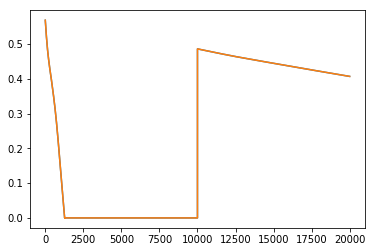

In [61]:
plt.plot(list(enumerate(range(len(rmse_a)))),rmse_a)

In [48]:
list(enumerate(range(10)))

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9)]

In [49]:
print (rmse_a[-1])

4.77874e-05
